# Tutorial 06 Dimension - A

This tutorial consists of two data explorations. The first uses data that is relatively similar to the data in the lecture notes and examples. The second is more unstructured and open ended.

**Notebooks**: We will be using Colab to create Python Notebooks on your Google Drive although you may also use Jupyter. Read the document Tutorials.pdf from Moodle to see how to set these up.

**Naming**: For each exploration you should create a notebook and save it when you have finished. You should name the two notebooks Tut06-A.ipynb and Tut06-B.ipynb. 

**Structure**: Every numbered item in the exploration should have a code section and a markdown section underneath where you discuss your findings. There should also be a code section at the top of the Notebook with the imports.


## Exploration A


The company who supplied the Products data in the lecture notes also want an investigation into their website. As well as the data explored over the last few weeks (https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv), there are a also a number of other data files in the same folder. All of these files show data averaged or totalled over the year under investigation:

- https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv shows, as a percentage, the average exit rate. For each page, this is the percentage of visitors who leave the site from that page (e.g. by clicking an external link or closing the browser tab).
- https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv shows the total revenue raised by serving adverts from each page.
- https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv shows, in Kilobytes, the size of the html content for each page.
- https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv shows the average time, in seconds, it takes for users to download each page.
- https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv shows the average time, in seconds, that users spend looking at each page.


These page metrics are typical of website data and, for example, can be obtained for a site that you own using Google Analytics.
As in the lecture examples, the company wants understand relationships between these metrics and between the total hits for each page (which can be obtained by summing the values in DailyHits.csv). In tutorial 02 you should have identified the high volume and medium volume pages, with the low volume being all the others. It was your choice how high, medium and low were defined, but for the purposes of this exploration pick the top 2 as high volume and the next 8 as medium volume (this is very likely to be the choice you made originally).

1.	[First read all the data](#1-first-read-all-the-data) in and compile a summary data frame, similar to the lecture examples.

2.	[Create an initial visualisation](#2-create-an-initial-visualisation) showing bar chart subplots for all 6 metrics (i.e. those from the 5 files plus the total hits). Comment briefly on any likely correlations.

3.	[Create a visualisation showing radar subplots for high volume pages. ](#3-create-a-visualisation-showing-radar-subplots-for-high-volume-pages)You should decide what order the 6 metrics appear around the each plot (using the guidelines in the lecture and noting that the company regards viewing time as a neutral indicator – it is good that users spend a lot of time on each page but it may mean that they can't find what they are looking for). Comment on the order you have chosen.

4.	Now create a visualisation showing radar subplots for medium volume pages. 

What you will notice is that some of the metrics are too small to distinguish from each other. This is because (assuming you have adapted one of the lecture examples) some of the metrics are being normalised by very large values from the high volume pages.

Instead it makes more sense to normalise by the maximum value from medium volume pages only since the visualisation is restricted to these pages. To do this create a normalised data frame using:

		normalised_data = summary_data / summary_data.loc[selected].max()
		
where "selected" contains the list of medium volume pages.
	Comment on which page seems most valuable in terms of hits and revenue.
5.	Next create a correlogram / pair-plot of all 6 metrics. Comment on the obvious correlations.

6.	Unfortunately the correlogram is a bit unclear for some subplots because again the total hits for the high volume pages are so much larger than the other pages. To explore the correlations further, create a heatmap of correlations between the 6 metrics, similar to those generated for lecture 04. Comment on the correlations that you identify.

7.	Finally the company is interested in how the viewing time varies across medium volume pages as compared with page hits and revenue. Generate a bubble plot of hits against revenue with viewing time determining the bubble sizes. 

In order to do this you will need to restrict the summary data to just medium volume pages. The easy way to do this is:

		summary_data = summary_data.loc[selected]

where "selected" contains the list of medium volume pages.
Given that you might expect that the page with the highest revenue might have the longest viewing time and / or the most hits, what feature (in terms of the combination of page hits, revenue and viewing time) stands out for this plot?



Two of your plots should like something like the ones below:


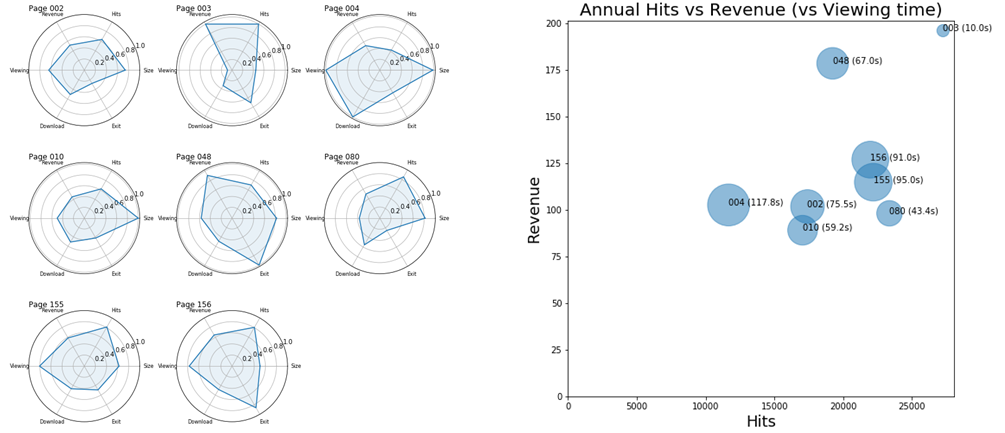


In [172]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1.	First read all the data
 in and compile a summary data frame, similar to the lecture examples.

In [173]:
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv", index_col=0)
data.index = pd.to_datetime(data.index)
exit_rate = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv", index_col=0)
revenue = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv", index_col=0)
page_size = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv", index_col=0)
page_speed = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv", index_col=0)
viewing_time = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv", index_col=0)

Let's combine these files into a single dataframe as below.

In [174]:
summary_data = pd.DataFrame(index=data.columns)
summary_data["PageExitRate"] = exit_rate.values
summary_data["Revenue"] = revenue.values
summary_data["PageSize"] = page_size.values
summary_data["PageSpeed"] = page_speed.values
summary_data["ViewingTime"] = viewing_time.values
summary_data["TotalHits"] = data.sum().values

print(f"The combined file has a {summary_data.shape[0]} datapoints with {summary_data.shape[1]} attributes.\n\
The attributes are {summary_data.columns.values}\n\n\
Let's have a look at the dataframe.")
summary_data.head()

The combined file has a 167 datapoints with 6 attributes.
The attributes are ['PageExitRate' 'Revenue' 'PageSize' 'PageSpeed' 'ViewingTime' 'TotalHits']

Let's have a look at the dataframe.


,PageExitRate,Revenue,PageSize,PageSpeed,ViewingTime,TotalHits
001,24.759071,1972.142118,106.153936,7.601041,175.438381,379682
002,18.458663,101.836934,79.352399,7.079163,75.474441,17401
003,47.518158,196.146652,48.208457,4.714836,10.027850,27249
004,32.354706,102.653630,105.709602,13.995231,117.802372,11668
005,45.828504,3.060067,43.593542,5.622858,12.522355,533


The dataframe shows that the values of the metrics are not uniformly scaled. These values will be normalised as we explore deeper

<!--  -->

### 2.	Create an initial visualisation
showing bar chart subplots for all 6 metrics (i.e. those from the 5 files plus the total hits). Comment briefly on any likely correlations.

In [175]:
print(f"The Answer to Everything, (-80538738812075974)**3 + 80435758145817515**3 + 12602123297335631**3 is:\n{(-80538738812075974)**3 + 80435758145817515**3 + 12602123297335631**3} ")

The Answer to Everything, (-80538738812075974)**3 + 80435758145817515**3 + 12602123297335631**3 is:
42 


In [176]:
print("Now let's get our high and medium hits pages.")
print("Pages\tTotal Hits", end="")
summary_data.sum(axis=1).sort_values(ascending=False).head(11)

Now let's get our high and medium hits pages.
Pages	Total Hits

015    470992.596594
001    381968.094547
003     27555.615953
080     23611.130369
155     22499.720732
156     22302.733637
048     19636.741716
002     17683.201600
010     17337.281635
004     12040.515541
008      1749.860637
dtype: float64

In [177]:
# From the table above
high_hits = ['015', '001']
medium_hits = ['048', '075', '041', '004', '165', '158', '073', '145']

#### **High Hits Bar Charts**

Let's have a look at the bar subplot visualitsation of metrics against the high hits pages

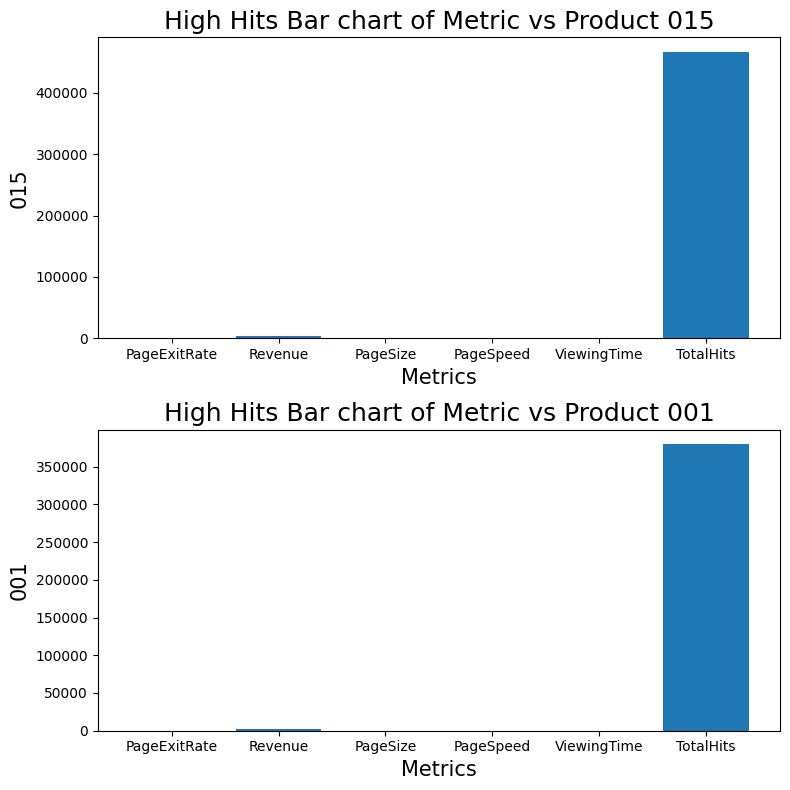

In [178]:
plt.figure(figsize=(8,8))
index = 1
for attribute in high_hits:
    x_pos = np.arange(len(summary_data.columns))
    sub = plt.subplot(2,1, index)
    sub.bar(x_pos, summary_data.loc[attribute], align="center") # the bar plot
    sub.set_xticks(x_pos, summary_data.columns)
    sub.set_xlabel("Metrics", fontsize=15)
    sub.set_ylabel(attribute, fontsize=15)
    sub.set_title(f"High Hits Bar chart of Metric vs Product {attribute}",fontsize=18)
    index += 1
plt.tight_layout()
plt.show()
    

### **Observation**


There is really nothing to draw out here as the value for the total hits metric appears higher than other metric values.

#### **Medium Hits Bar Charts**

Just like we did for the high hits pages, we have a look at the bar chart visualitsation of metrics against the medium hits pages

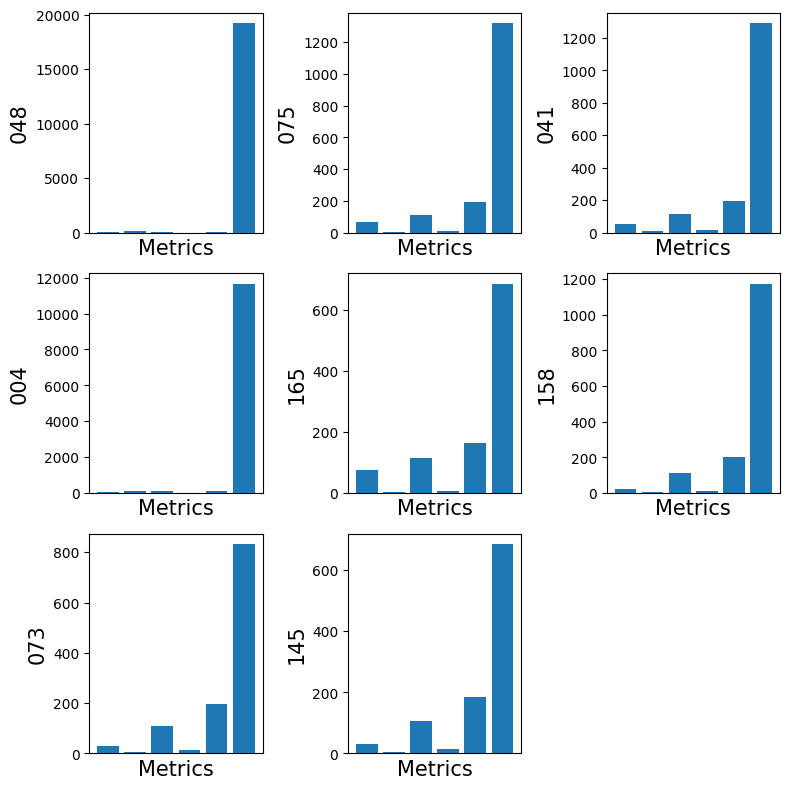

In [179]:
plt.figure(figsize=(8,8))
index = 1
for attribute in medium_hits:
    x_pos = np.arange(len(summary_data.columns))
    sub = plt.subplot(3,3, index)
    sub.bar(x_pos, summary_data.loc[attribute], align="center") # the bar plot
    sub.set_xticks([])
    sub.set_xlabel("Metrics", fontsize=15)
    sub.set_ylabel(attribute, fontsize=15)
    # sub.set_title(f"High Hits Bar chart of Metric vs Product {attribute}",fontsize=18)
    index += 1
plt.tight_layout()
plt.show()
    

#### Observation

The subplots for medium hit pages, apart from the total hits, show a positive correlation between the pages size and and viewing time for pages `165`, `158`, `073`, `145` but negative for the download speed metric. This could be due to the presence of media files on these pages and/or that the pages are not easily navigable.


### 3.	Create a visualisation showing radar subplots for high volume pages.

You should decide what order the 6 metrics appear around the each plot (using the guidelines in the lecture and noting that the company regards viewing time as a neutral indicator – it is good that users spend a lot of time on each page but it may mean that they can't find what they are looking for). Comment on the order you have chosen.

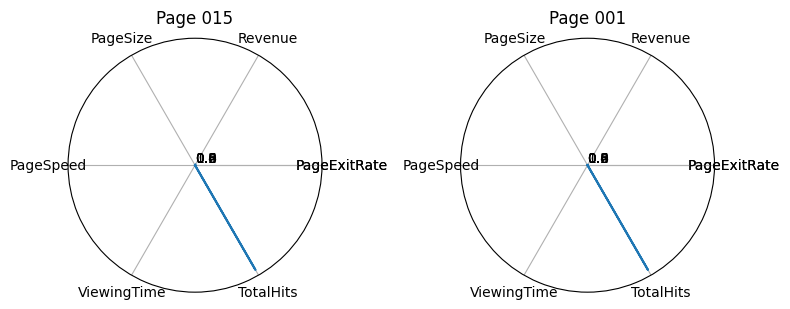

In [180]:
n_attributes = len(summary_data.columns)
labels = list(summary_data.columns)
labels.append("PageExitRate")

angles = [n/float(n_attributes)*2*np.pi for n in range(n_attributes+1)]
plt.figure(figsize=(8,8))
index = 1
for name in high_hits:
    values = summary_data.loc[name].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(1, 2, index, polar=True)
    sub.plot(angles, values)
    sub.set_yticks([.2, .4, .6, .8, 1.0])
    sub.set(xticks=angles,
            xticklabels=labels,
            title=f"Page {name}")
    index += 1
plt.tight_layout()
plt.show()

Not so clear to find any meaning obsrvation here since the pages' values are scaled differently.

normalisation will be done for the medium hits data.

In [181]:
# Reorder the metrics based on the order of importance
column_order = ["ViewingTime", "Revenue", "TotalHits", "PageSpeed", "PageSize", "PageExitRate", "ViewingTime"]

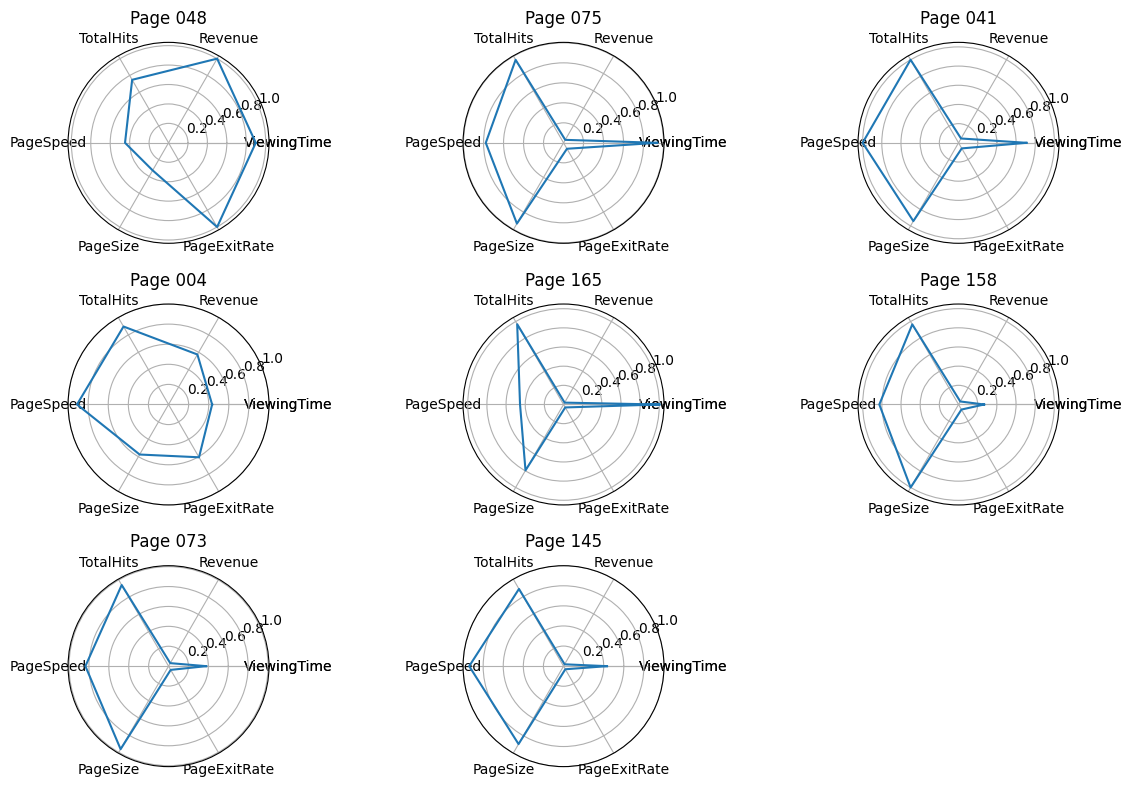

In [182]:
normalised_medium = summary_data  / summary_data.loc[medium_hits].max()

n_attributes = len(normalised_medium.columns)
attributes_order = ["ViewingTime", "Revenue", "TotalHits", "PageSpeed", "PageSize", "PageExitRate", "ViewingTime"]


angles = [n/float(n_attributes)*2*np.pi for n in range(n_attributes+1)]
plt.figure(figsize=(12,8))
index = 1
for name in medium_hits:
    values = normalised_medium.loc[name].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, index, polar=True)
    sub.plot(angles, values)
    sub.set_yticks([.2, .4, .6, .8, 1.0])
    sub.set(xticks=angles,
            xticklabels=attributes_order,
            title=f"Page {name}")
    index += 1
plt.tight_layout()
plt.show()

#### **Comment**
- The attributes are ordered in such a manner:
    - positive metrics that the company might want to maximise (revenue and total hits) are at the top.
    - negative metrics that the company might want to minimise (page exit rate and page size) are at the bottom
    - Veiwing time is in the middle as it is neither
    - per unit values (profit, price & cost) are on the right
    - total measures (sales & marketing) are on the left

In [183]:
# MinMaxScaler Normalizer
# def normalize(df):
#     result = df.copy()
#     for feature_name in df.columns:
#         max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result